In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from sklearn.datasets import make_circles
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

In [0]:
%matplotlib inline

In [0]:
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = 10, 10

In [0]:
np.random.seed(137)

In [0]:
X, y = make_circles(n_samples=500, noise=0.35, factor=0.1, random_state=137)

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [28]:
dTree = DecisionTreeClassifier(random_state=137)
dTree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=137, splitter='best')

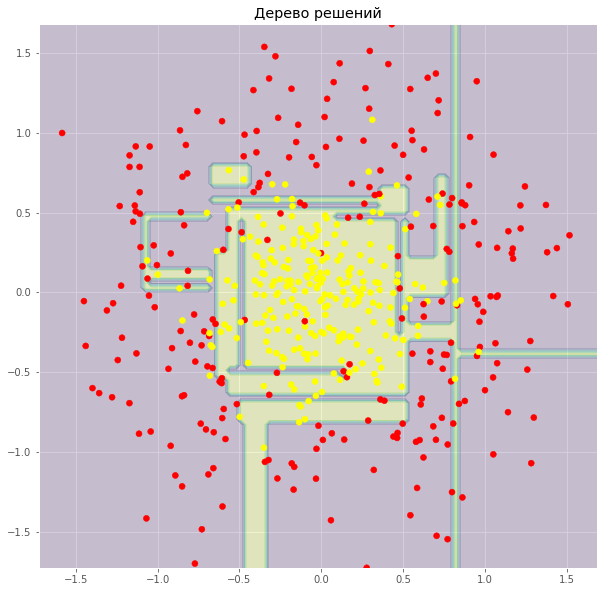

In [12]:
x_range = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = dTree.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='autumn')
plt.title("Дерево решений")
plt.show()

In [29]:
rForest = RandomForestClassifier(random_state=137, n_estimators=300)
rForest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=137,
                       verbose=0, warm_start=False)

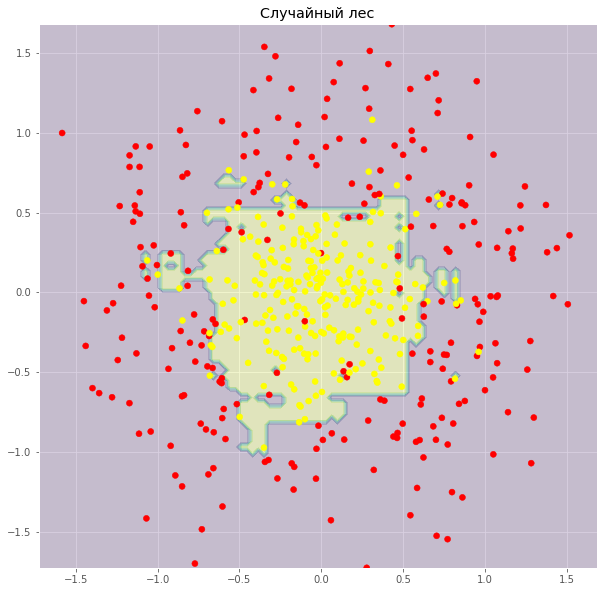

In [16]:
x_range = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = rForest.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='autumn')
plt.title("Случайный лес")
plt.show()

In [0]:
from sklearn.model_selection import cross_val_score

In [30]:
cross_val_score(rForest, X, y, cv=7).mean()

0.9631780444788574

In [31]:
cross_val_score(dTree, X, y, cv=7).mean()

0.9262485481997675

In [33]:
svc = SVC(random_state=137, kernel='rbf')
svc.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=137, shrinking=True, tol=0.001,
    verbose=False)

In [34]:
'''x_range = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = svc.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='autumn')
plt.title("SVC")
plt.show()'''
print(cross_val_score(svc, X, y, cv=7).mean())

0.9157955865272938


In [0]:
X, y = load_breast_cancer(return_X_y=True)

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)